In [1]:
import cv2
import numpy as np
from skimage import io

from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv

In [2]:
def url_to_image(url):
    print("downloading %s" % (url))
    image = io.imread(url)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def cv2_imshow(img):
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.axis("off")
    plt.show()
    
def show_color_plot(img):
    r, g, b = cv2.split(img)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    
    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.show()
    
def display_colors(color1, color2):
    lo_square = np.full((10, 10, 3), color1, dtype=np.uint8) / 255.0
    do_square = np.full((10, 10, 3), color2, dtype=np.uint8) / 255.0
    
    plt.subplot(1, 2, 1)
    plt.imshow(hsv_to_rgb(do_square))
    plt.subplot(1, 2, 2)
    plt.imshow(hsv_to_rgb(lo_square))
    plt.show()


In [8]:
images = [
    {
    'url': 'https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj1.jpg',
    'bbox': (20,20,450,250)
    },
    {
    'url': 'https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj2.jpg',
    'bbox': (74,50,437,282)б
    'notes': 'color'
    },
    {
    'url': 'https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj3.jpg',
    'bbox': (20,20,450,250)
    },
    {
    'url': 'https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj4.jpg',
    'bbox': (20,20,450,250),
    'notes': 'canny'
    },
    {
    'url': 'https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj5.jpg',
    'bbox': (20,20,450,250)
    },
    {
    'url': 'https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj6.jpg',
    'bbox': (50,50,270,470),
    'markers': 'obj6.npy'
    }  
]

### Color segmentation

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

https://realpython.com/python-opencv-color-spaces/

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj1.jpg


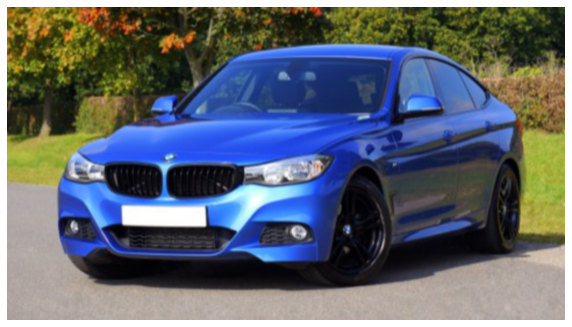

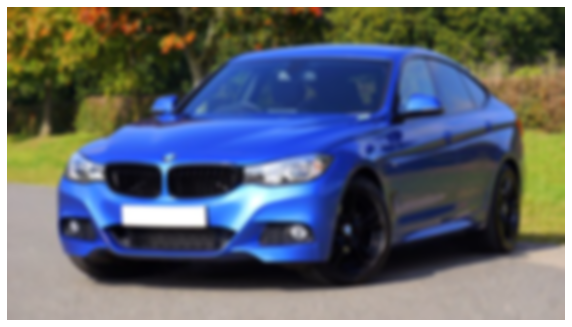

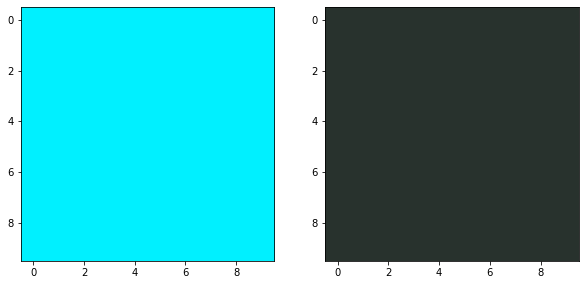

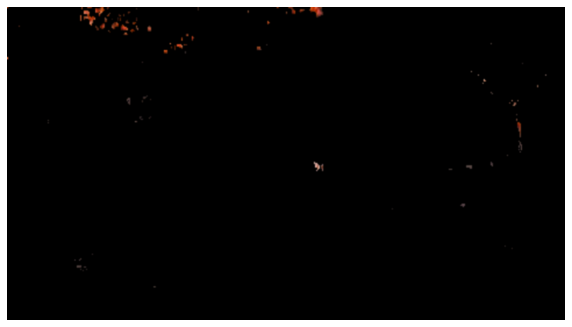

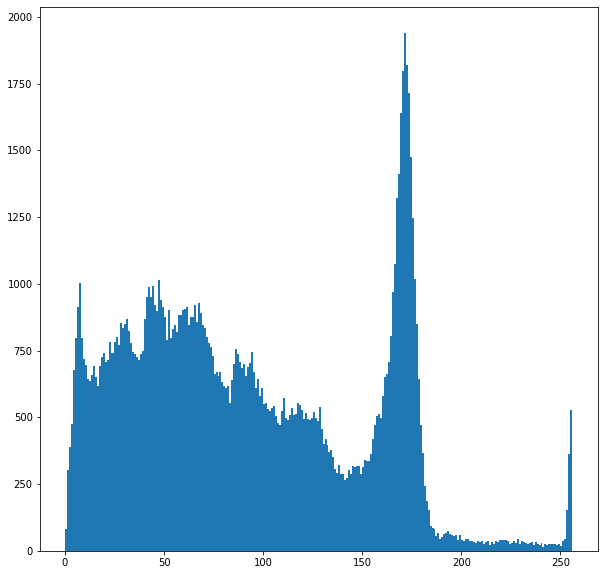

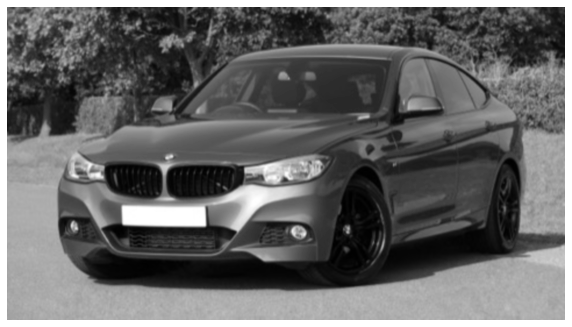

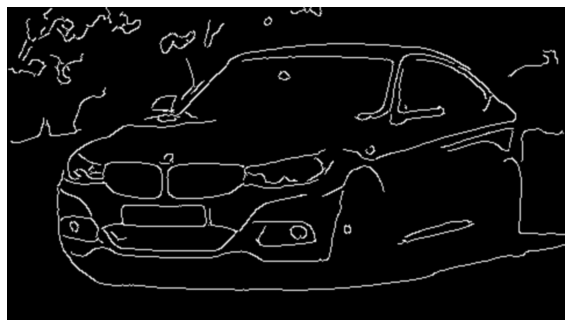

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj2.jpg


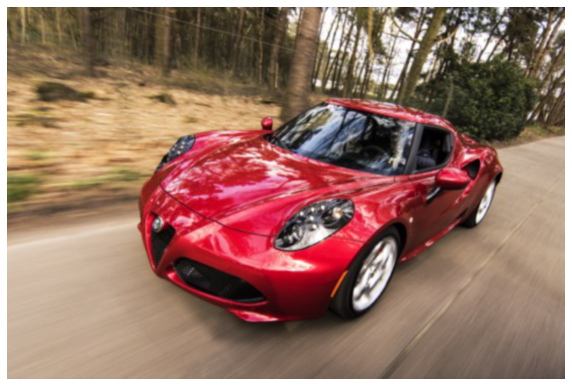

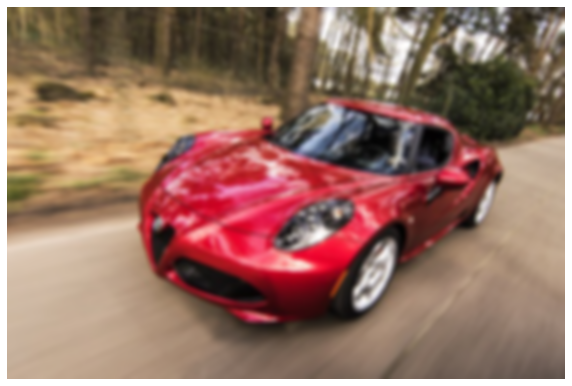

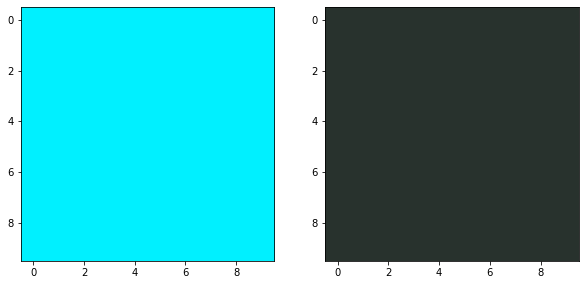

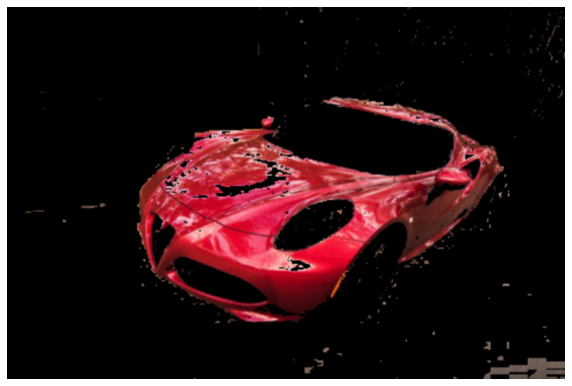

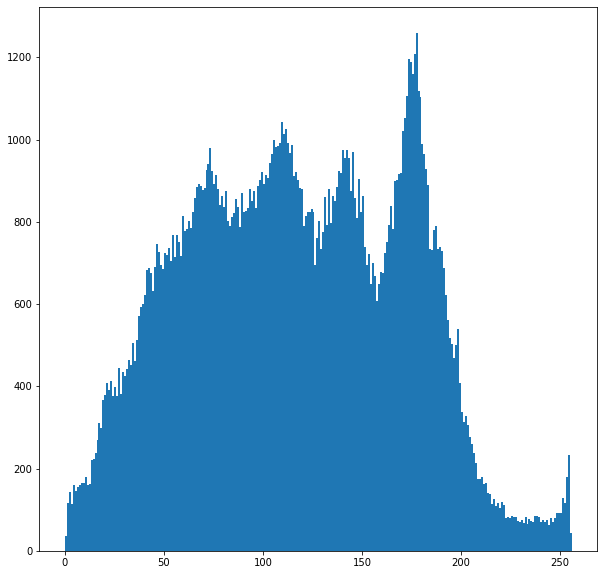

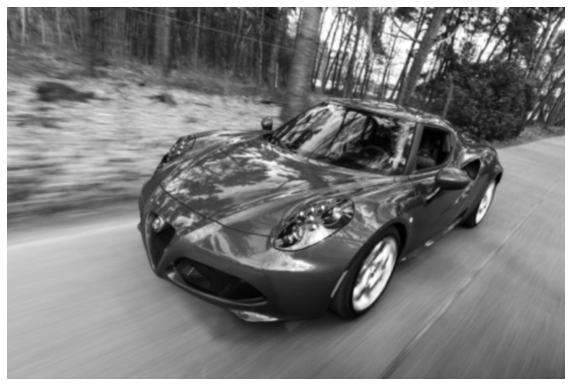

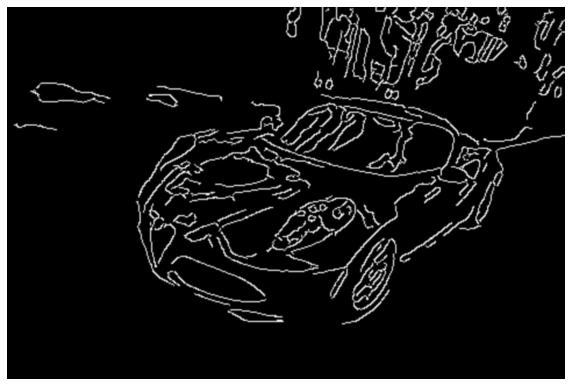

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj3.jpg


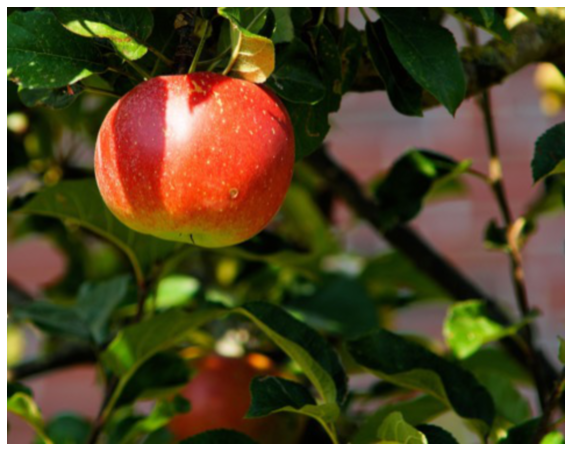

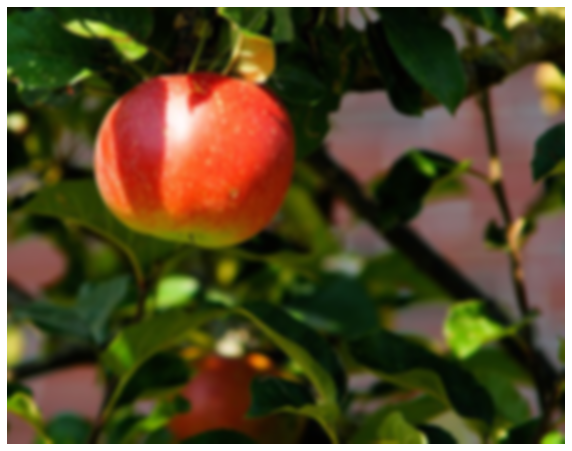

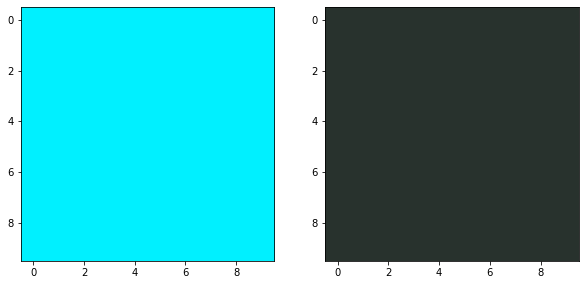

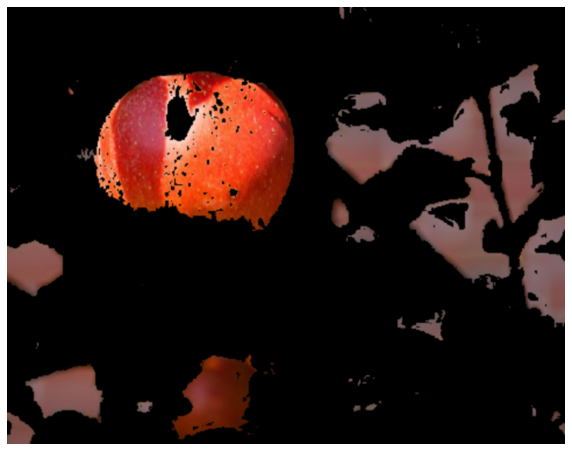

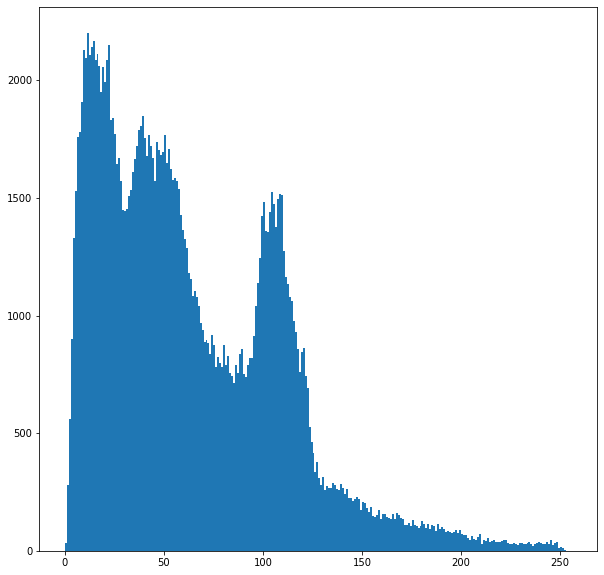

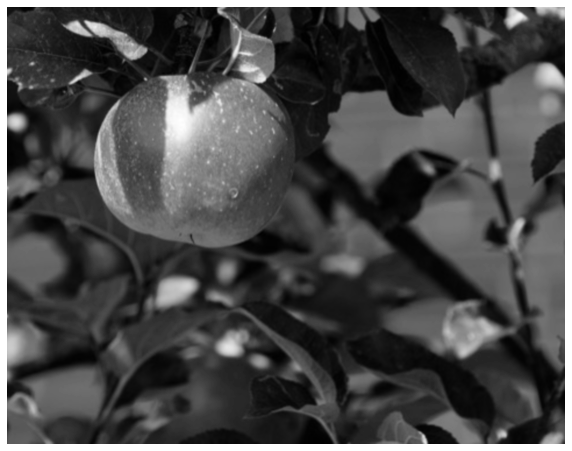

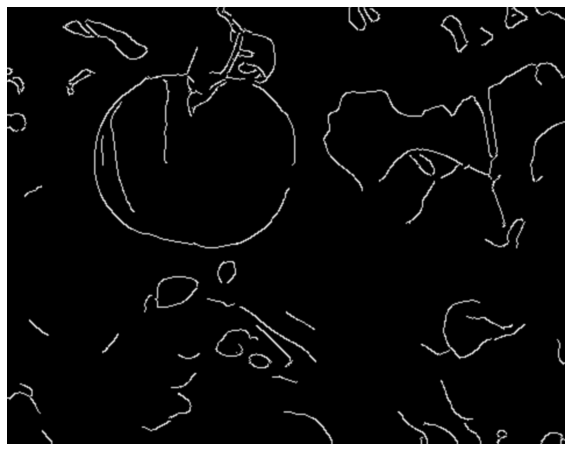

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj4.jpg


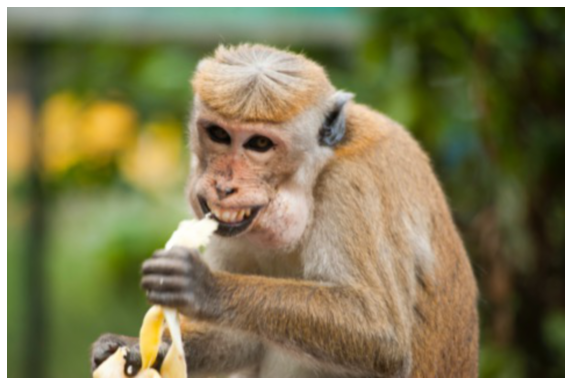

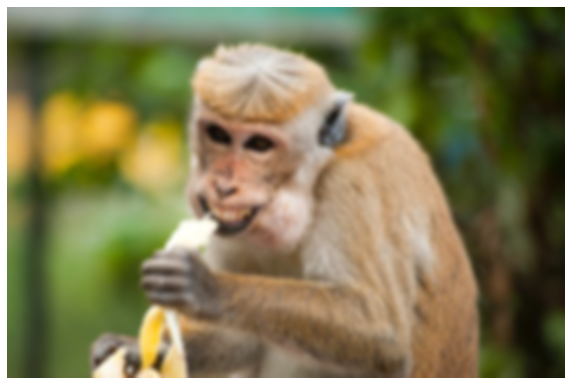

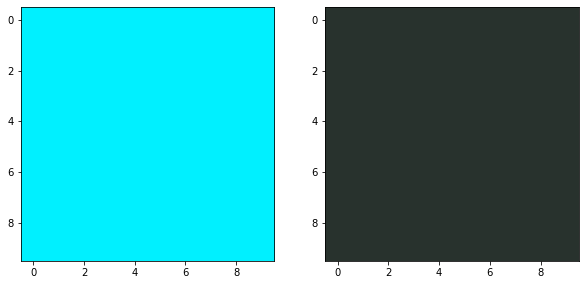

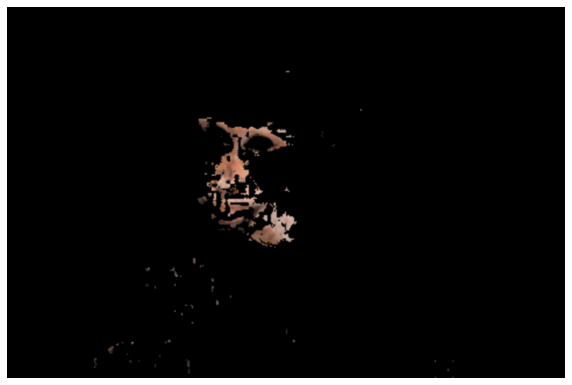

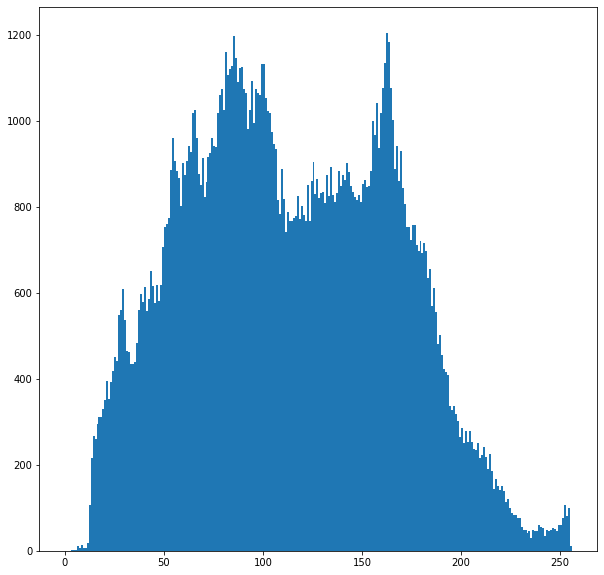

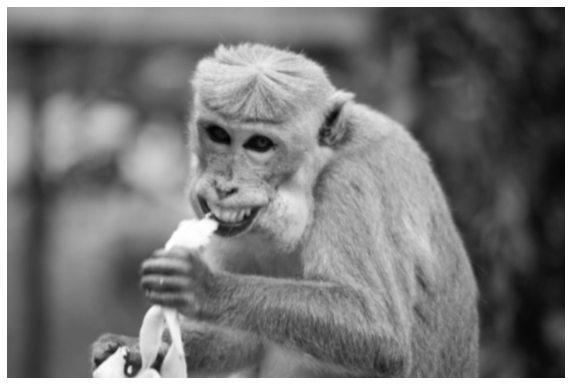

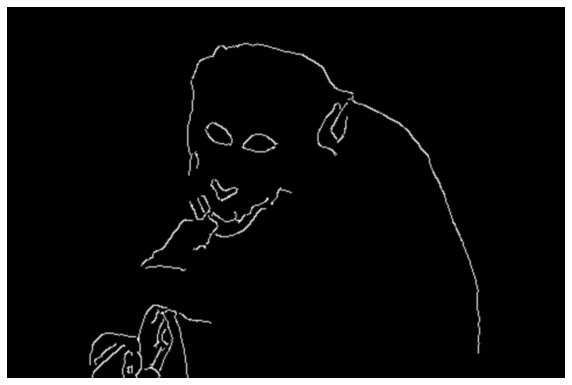

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj5.jpg


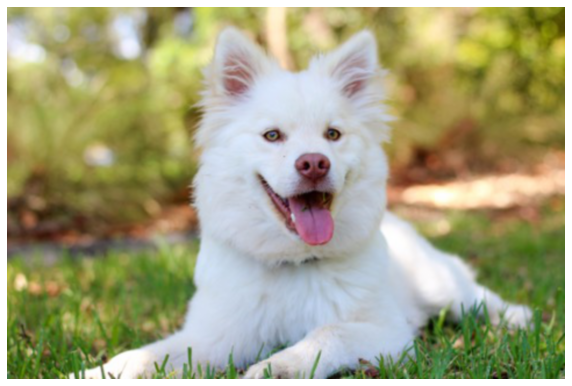

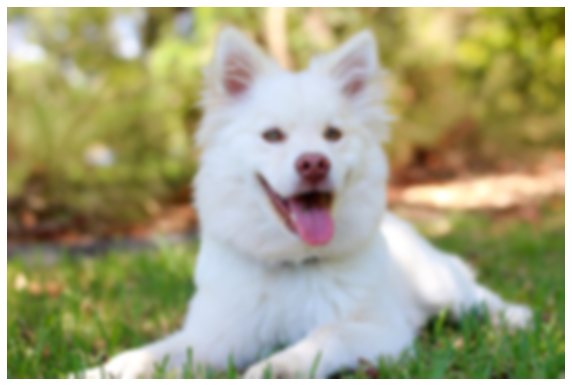

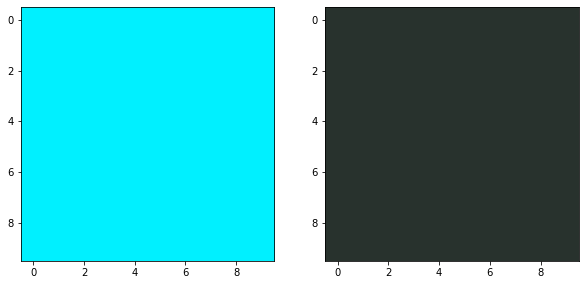

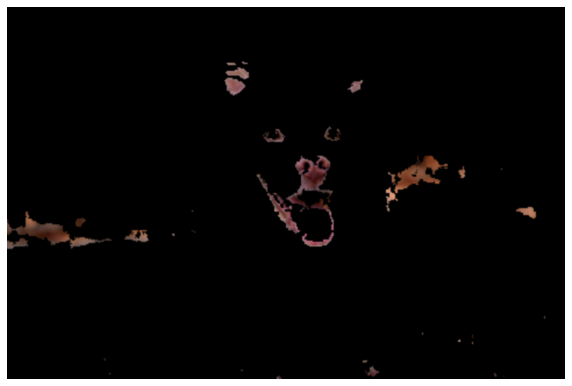

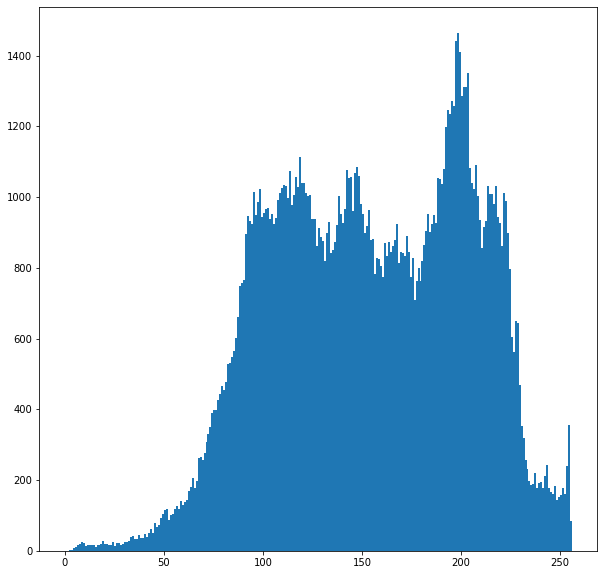

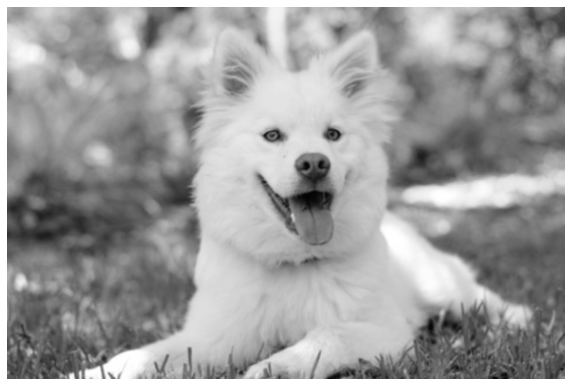

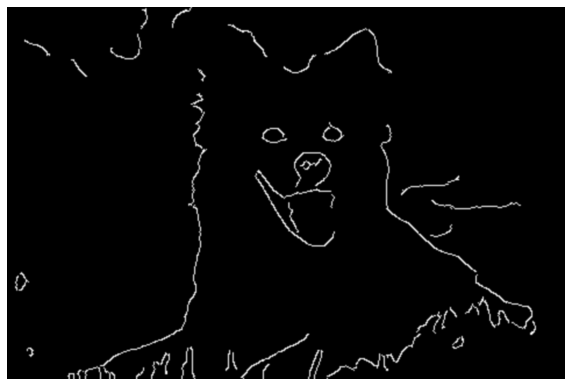

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj6.jpg


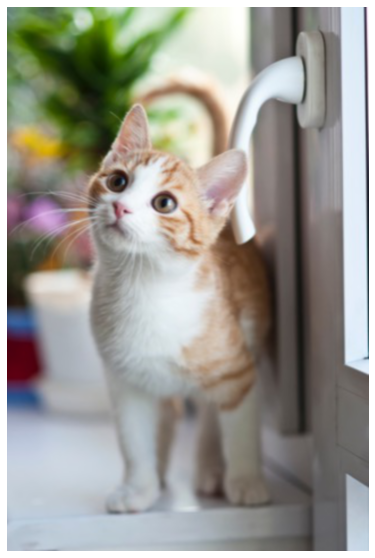

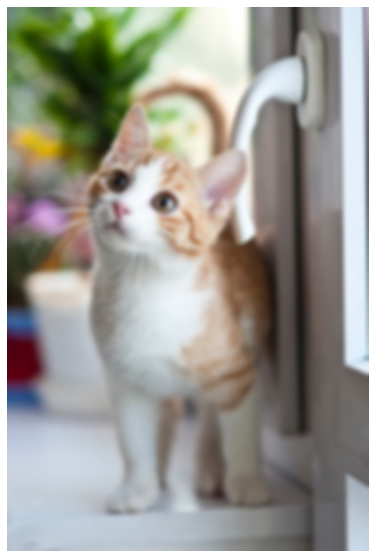

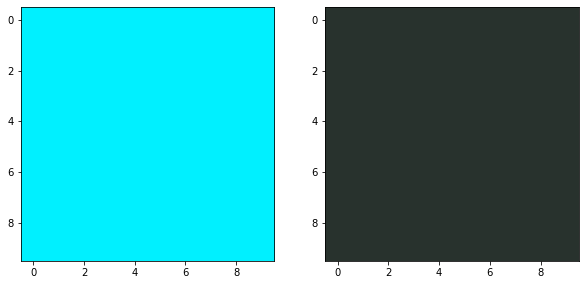

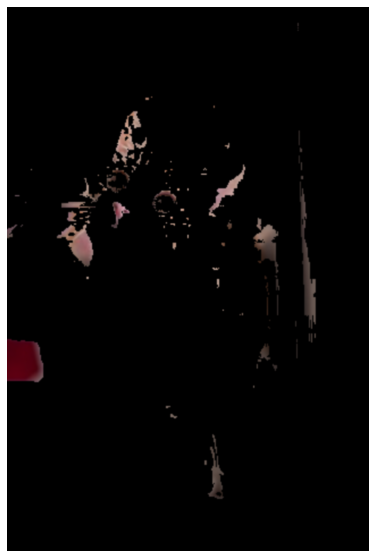

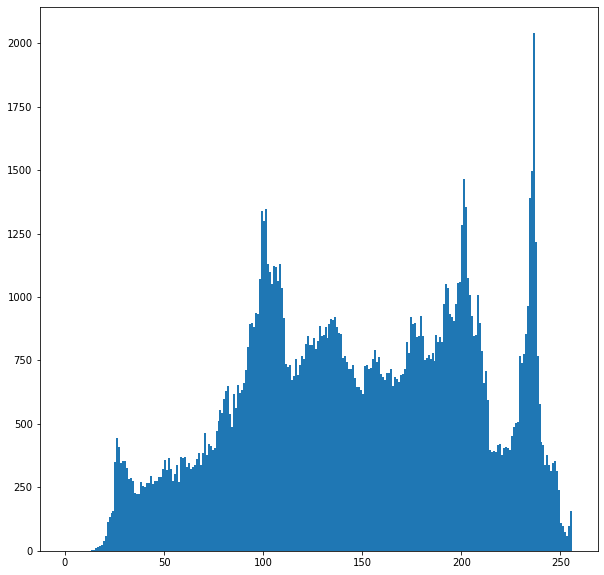

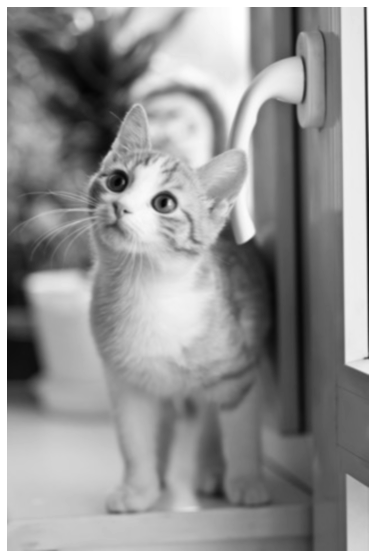

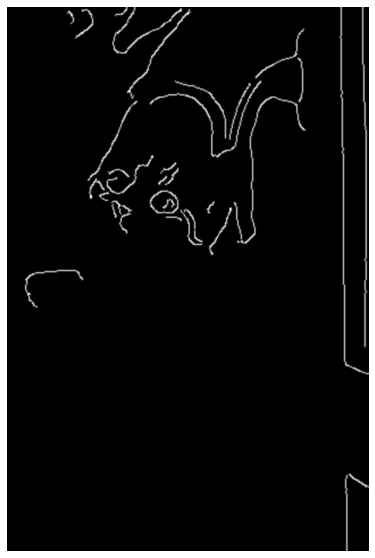

In [18]:
for image_obj in images:
    img = url_to_image(image_obj['url'])
    rect = image_obj['bbox']
    cv2_imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    
    blur = cv2.GaussianBlur(img,(7,7),2)
    cv2_imshow(cv2.cvtColor(blur,cv2.COLOR_BGR2RGB))
    
    #show_color_plot(img)
    min_color = np.array([110,50,50])
    max_color = np.array([130,255,255])
    display_colors(min_color, max_color)
    
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_img, min_color, max_color)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2_imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.hist(gray.ravel(),256,[0,256]); plt.show()
    cv2_imshow(gray)
    
    edges = cv2.Canny(blur,100,200)
    cv2_imshow(edges)

In [20]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global img,mask,bgdModel,fgdModel
    
    if event == cv2.EVENT_LBUTTONDBLCLK:
        mask[y,x] = cv2.GC_BGD
        
    if event == cv2.EVENT_RBUTTONDBLCLK:
        print(x,y)
        mask[y,x] = cv2.GC_FGD
    
    mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# Create a black image, a window and bind the function to window
img = url_to_image('https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj2.jpg')
rect = (50,50,270,460)

mask = np.zeros(img.shape[:2],np.uint8)
    
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while(1):
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img1 = img*mask[:,:,np.newaxis]
    cv2.imshow('image',img1)
    
    if cv2.waitKey(20) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj2.jpg


In [6]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
            
            
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj6.jpg


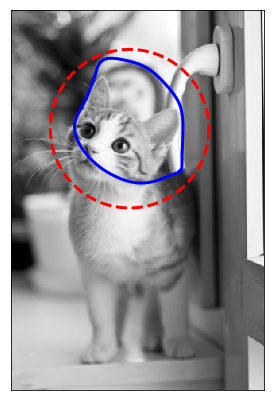

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = url_to_image('https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj6.jpg')
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
x = 150 + 100*np.cos(s)
y = 150 + 100*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()